In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



df = pd.read_csv('Churn_Modelling.csv')


In [2]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [4]:
#Classifying customers that are leaving and not leaving the company
tenure_not_leaving = df[df.Exited==0].Tenure
tenure_leaving = df[df.Exited==1].Tenure

In [5]:
tenure_not_leaving

1        1
3        1
4        2
6        7
8        4
        ..
9993     7
9994     2
9995     5
9996    10
9999     4
Name: Tenure, Length: 7963, dtype: int64

In [6]:
tenure_leaving

0       2
2       8
5       8
7       4
16      1
       ..
9981    3
9982    7
9991    4
9997    7
9998    3
Name: Tenure, Length: 2037, dtype: int64

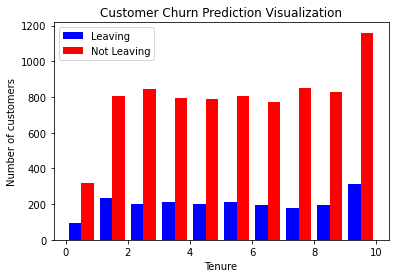

In [7]:
#A plot of customers leaving the company and not leaving
plt.hist([tenure_leaving, tenure_not_leaving], color=['blue', 'red'], label=['Leaving', 'Not Leaving'])

plt.xlabel('Tenure')
plt.ylabel('Number of customers')
plt.title('Customer Churn Prediction Visualization')

plt.legend()

In [8]:
not_leaving = df[df.Exited==0].Geography
leaving = df[df.Exited==1].Geography

In [9]:
leaving

0        France
2        France
5         Spain
7       Germany
16      Germany
         ...   
9981    Germany
9982    Germany
9991     France
9997     France
9998    Germany
Name: Geography, Length: 2037, dtype: object

In [10]:
not_leaving

1        Spain
3       France
4        Spain
6       France
8       France
         ...  
9993    France
9994    France
9995    France
9996    France
9999    France
Name: Geography, Length: 7963, dtype: object

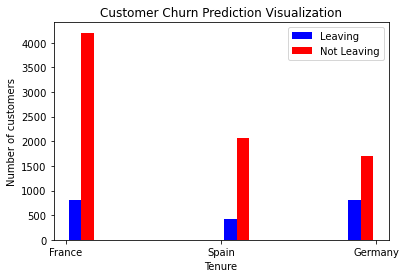

In [11]:
plt.hist([leaving, not_leaving], color=['blue', 'red'], label=['Leaving', 'Not Leaving'])

plt.xlabel('Tenure')
plt.ylabel('Number of customers')
plt.title('Customer Churn Prediction Visualization')

plt.legend()

In [12]:
#Data Cleaning

In [13]:
#A function to find out unique values in each column where the datatype is an object

def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column} : {df[column].unique()}')

In [14]:
print_unique_col_values(df)

Surname : ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
Geography : ['France' 'Spain' 'Germany']
Gender : ['Female' 'Male']


In [15]:
#Transforming Gender and Geography columns to 0 and 1 so our model can understand our data
df['Gender'].replace({'Female':1, 'Male':0},inplace=True)
#Doing a hot encoding to split our Geography column
df2 = pd.get_dummies(data=df, columns=['Geography'])

In [16]:
df2

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,2,15647311,Hill,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,15619304,Onio,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,4,15701354,Boni,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,15737888,Mitchell,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,0,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,9997,15569892,Johnstone,516,0,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,9998,15584532,Liu,709,1,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,9999,15682355,Sabbatini,772,0,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [17]:
#Scaling columns: credit score, balance, tenure, estimated salaries into zeros and ones using the MinMax scaler

cols_to_scale = ['CreditScore', 'Balance', 'Tenure', 'EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [18]:
df2

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,0.538,1,42,0.2,0.000000,1,1,1,0.506735,1,1,0,0
1,2,15647311,Hill,0.516,1,41,0.1,0.334031,1,0,1,0.562709,0,0,0,1
2,3,15619304,Onio,0.304,1,42,0.8,0.636357,3,1,0,0.569654,1,1,0,0
3,4,15701354,Boni,0.698,1,39,0.1,0.000000,2,0,0,0.469120,0,1,0,0
4,5,15737888,Mitchell,1.000,1,43,0.2,0.500246,1,1,1,0.395400,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,0.842,0,39,0.5,0.000000,2,1,0,0.481341,0,1,0,0
9996,9997,15569892,Johnstone,0.332,0,35,1.0,0.228657,1,1,1,0.508490,0,1,0,0
9997,9998,15584532,Liu,0.718,1,36,0.7,0.000000,1,0,1,0.210390,1,1,0,0
9998,9999,15682355,Sabbatini,0.844,0,42,0.3,0.299226,2,1,0,0.464429,1,0,1,0


In [19]:
#A new dataframe comprising of needed columns for our model
new_df = df2[['CreditScore', 'Gender', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France', 'Geography_Germany', 'Geography_Spain']].copy()

In [20]:
new_df

,CreditScore,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1,0.2,0.000000,1,1,1,0.506735,1,1,0,0
1,0.516,1,0.1,0.334031,1,0,1,0.562709,0,0,0,1
2,0.304,1,0.8,0.636357,3,1,0,0.569654,1,1,0,0
3,0.698,1,0.1,0.000000,2,0,0,0.469120,0,1,0,0
4,1.000,1,0.2,0.500246,1,1,1,0.395400,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0,0.5,0.000000,2,1,0,0.481341,0,1,0,0
9996,0.332,0,1.0,0.228657,1,1,1,0.508490,0,1,0,0
9997,0.718,1,0.7,0.000000,1,0,1,0.210390,1,1,0,0
9998,0.844,0,0.3,0.299226,2,1,0,0.464429,1,0,1,0


In [21]:
#We need to split our dataset into train and test samples before creating our Machine learning model

X = new_df.drop('Exited', axis='columns')
y = new_df['Exited']

In [22]:
from sklearn.model_selection import train_test_split
#We are training 70% of our data and testing 30%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=5)

In [23]:
X_train.shape

(7000, 11)

In [24]:
X_test.shape

(3000, 11)

In [25]:
X_train[:10]

,CreditScore,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
2926,0.320,0,0.8,0.000000,2,1,1,0.576456,1,0,0
4634,0.520,1,0.3,0.000000,1,1,0,0.191345,0,0,1
416,0.274,1,0.5,0.439892,1,0,0,0.056870,0,1,0
6369,0.592,1,0.2,0.000000,2,0,0,0.893791,1,0,0
7952,0.792,1,0.2,0.429928,2,1,1,0.730974,0,1,0
4066,0.946,1,0.1,0.000000,2,0,1,0.912508,1,0,0
3018,0.476,1,0.8,0.000000,1,1,0,0.100284,1,0,0
2543,1.000,1,0.1,0.000000,2,0,1,0.345239,0,0,1
9685,0.486,0,0.4,0.553313,1,0,0,0.054091,1,0,0
6291,0.426,0,0.7,0.000000,2,0,0,0.081548,0,0,1


In [26]:
len(X_train.columns)

11

In [28]:
import tensorflow as tf
from tensorflow import keras

#Creating a neural network and entering our layers

model = keras.Sequential([
    #input layer stating the number of neurons we want to have
    keras.layers.Dense(8, input_shape=(11,), activation='relu'),
    #Output layer
    keras.layers.Dense(1, activation='sigmoid')
])

#Specifying optimizer loss and matrix and we'll use adam as our optimizer

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

#running our model to get accuracy percent
model.fit(X_train, y_train, epochs=5)


ModuleNotFoundError: No module named 'tensorflow'